In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import xlrd
import datetime
%matplotlib inline

In [157]:
purchase = pd.read_csv('data/QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [223]:
transaction = pd.read_excel('data/QVI_transaction_data.xlsx')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Converting 'DATE' to date type

In [ ]:
book = xlrd.open_workbook("data/QVI_transaction_data.xlsx")
datemode = book.datemode
transaction["DATE"].map(lambda x:xlrd.xldate_as_tuple(x, datemode))
transaction['DATE'] =  transaction["DATE"].map(lambda x:datetime.datetime(*xlrd.xldate_as_tuple(x,datemode)))

In [235]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase.shape

(72637, 3)

In [5]:
transaction.shape

(264836, 8)

In [10]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [238]:
df = pd.merge(transaction,purchase)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


Creating Size and Brand columns

In [239]:
df['SIZE'] = df['PROD_NAME'].apply(lambda x: x[-4:-1])
df['BRAND'] = df['PROD_NAME'].apply(lambda x: x.split(' ')[0])
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160,WW
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths


Checking to see if there's any error in the created columns

In [240]:
df['SIZE'].unique()

array(['175', '160', '170', '150', '300', '165', '380', '330', '110',
       '210', '180', '200', '134', '270', '220', '125', ' 70', 'Sal',
       '250', ' 90', '190'], dtype=object)

See what products have been assigned as 'Sal'

In [241]:
df[df['SIZE']=='Sal'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
101,2019-04-30,39,39167,35644,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle
132,2018-11-23,45,45127,41120,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle
152,2019-04-01,55,55072,48881,63,Kettle 135g Swt Pot Sea Salt,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Sal,Kettle


Apparently all the items assigned 'Sal' as their size need to be assigned 135

In [242]:
df.loc[df['SIZE']=='Sal','SIZE'] = '135'

In [243]:
df['SIZE'].unique()

array(['175', '160', '170', '150', '300', '165', '380', '330', '110',
       '210', '180', '200', '134', '270', '220', '125', ' 70', '135',
       '250', ' 90', '190'], dtype=object)

Checking if BRAND's column has any uncorrectly assings

In [244]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Old', 'Tyrrells',
       'Dorito', 'Doritos', 'Infuzions', 'Grain', 'Thins', 'Red',
       'GrnWves', 'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'RRD',
       'Infzns', 'Burger', 'NCC', 'Cheezels', 'Smith', 'Woolworths',
       'French', 'Sunbites', 'Cheetos', 'Snbts'], dtype=object)

Apparently Dorito, Infzns, Red, and Snbts have been misassigned.

In [245]:
df.loc[df['BRAND']=='Dorito','BRAND'] = 'Doritos'
df.loc[df['BRAND']=='Snbts','BRAND'] = 'Sunbites'
df.loc[df['BRAND']=='Infzns','BRAND'] = 'Infuzions'
df.loc[df['BRAND']=='Red','BRAND'] = 'RRD'

In [246]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'WW', 'Smiths', 'Kettle', 'Old', 'Tyrrells',
       'Doritos', 'Infuzions', 'Grain', 'Thins', 'RRD', 'GrnWves',
       'Tostitos', 'Pringles', 'Cobs', 'Twisties', 'Burger', 'NCC',
       'Cheezels', 'Smith', 'Woolworths', 'French', 'Sunbites', 'Cheetos'],
      dtype=object)

Setting 'SIZE' column as integer

In [202]:
df['SIZE'] = df['SIZE'].astype(int)

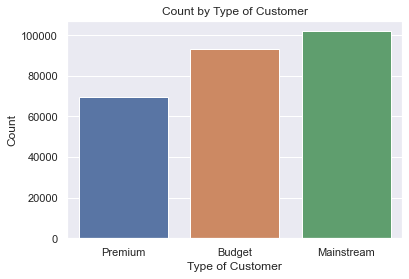

In [77]:
sns.countplot(data=df,x='PREMIUM_CUSTOMER');
plt.title("Count by Type of Customer")
plt.xlabel("Type of Customer")
plt.ylabel("Count");

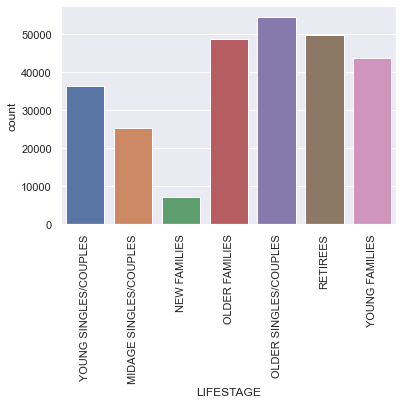

In [76]:
sns.countplot(data=df,x='LIFESTAGE')
plt.xticks(rotation=90);

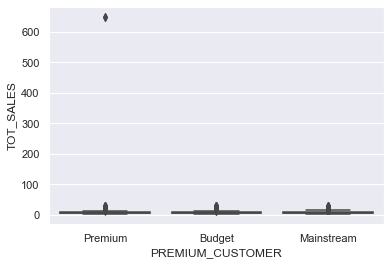

In [55]:
sns.boxplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=df,palette='rainbow')

Checking who's the outlier.

In [206]:
df['TOT_SALES'].sort_values(ascending=False)

71456     650.0
71457     650.0
5745       29.5
119732     29.5
151907     29.5
          ...  
228816      1.5
213096      1.5
86854       1.5
6570        1.5
228219      1.5
Name: TOT_SALES, Length: 264836, dtype: float64

In [207]:
df.iloc[71456:71458]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND
71456,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380,Doritos
71457,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium,380,Doritos


Removing the outliers

In [208]:
df = df.drop(index=[71456,71457])

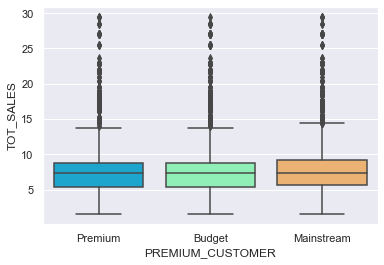

In [209]:
sns.boxplot(x="PREMIUM_CUSTOMER", y="TOT_SALES", data=df,palette='rainbow')

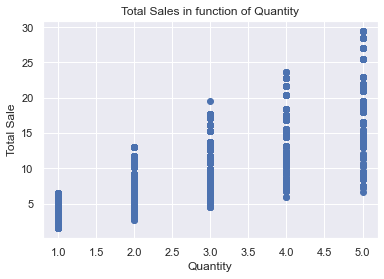

In [210]:
plt.scatter(df['PROD_QTY'], 
            df['TOT_SALES'], 
            )

plt.title("Total Sales in function of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Total Sale");

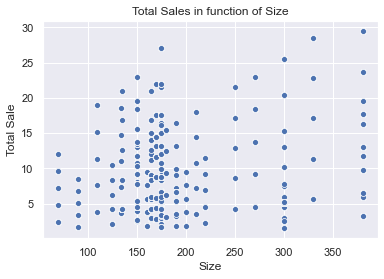

In [215]:
sns.scatterplot(data=df.sort_values(by='SIZE'),x='SIZE',y='TOT_SALES')
plt.title("Total Sales in function of Size")
plt.xlabel("Size")
plt.ylabel("Total Sale");

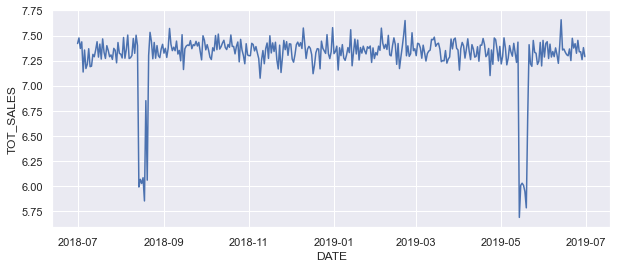

In [252]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='DATE',y='TOT_SALES',err_style=None)